In [1]:
# Import packages
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pickle

## Colour analysis

In [ ]:
# Load train and test sets from pickle
with open('train_imgs.pkl', 'rb') as f:
    train_imgs = pickle.load(f)
with open('test_imgs.pkl', 'rb') as f:
    test_imgs = pickle.load(f)

In [41]:
def process_img(img, uppermask, lowermask):
    ''' Function to count the red pixels of an image in HSV'''

    opencv = np.array(img)[:, :, ::-1].copy() # Pass image to OpenCV framework
    hsv = cv2.cvtColor(opencv, cv2.COLOR_BGR2HSV) # Pass image to HSV colour space
    mask = cv2.inRange(hsv, uppermask, lowermask) # Create mask for red colour
    
    # Apply the mask to the image
    output_hsv = hsv.copy()
    output_hsv[np.where(mask==0)] = 0     
    return np.sum(output_hsv) 

In [ ]:
# Append the red pixels count of each image
masking = [np.array([160,25,100]), np.array([179,255,255])]

for image in train_imgs:
    npixels = process_img(image['img'][0], masking[0], masking[1])
    recpixels = process_img(image['img'][1], masking[0], masking[1]) 
    image['info'].append(npixels)    

for image in test_imgs:
    npixels = process_img(image['img'][0], masking[0], masking[1])
    recpixels = process_img(image['img'][1], masking[0], masking[1])
    image['info'].append(npixels)

In [ ]:
train_imgs[33]

{'img': <PIL.Image.Image image mode=RGB size=256x256>,
 'info': ['B22-103', '2201_Aug2', '1', 21542]}

In [ ]:
test_imgs[33]

In [ ]:
# Rewrite pickle files
with open('train_imgs.pkl', 'wb') as f:
    pickle.dump(train_imgs, f)
with open('test_imgs.pkl', 'wb') as f:
    pickle.dump(test_imgs, f)

### Visualize

In [45]:
def visualize(img, masking, titles):
    cv = np.array(img)[:, :, ::-1].copy()    

    hsv = cv2.cvtColor(cv, cv2.COLOR_BGR2HSV)    
    out = hsv.copy()    

    mask = cv2.inRange(hsv, masking[0], masking[1])
    out[np.where(mask==0)] = 0    

    # Plot images side by side    
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))

    # Display each image
    for ax, img, title in zip(axs, [img, hsv, out], titles):
        ax.imshow(img)
        ax.set_title(title)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

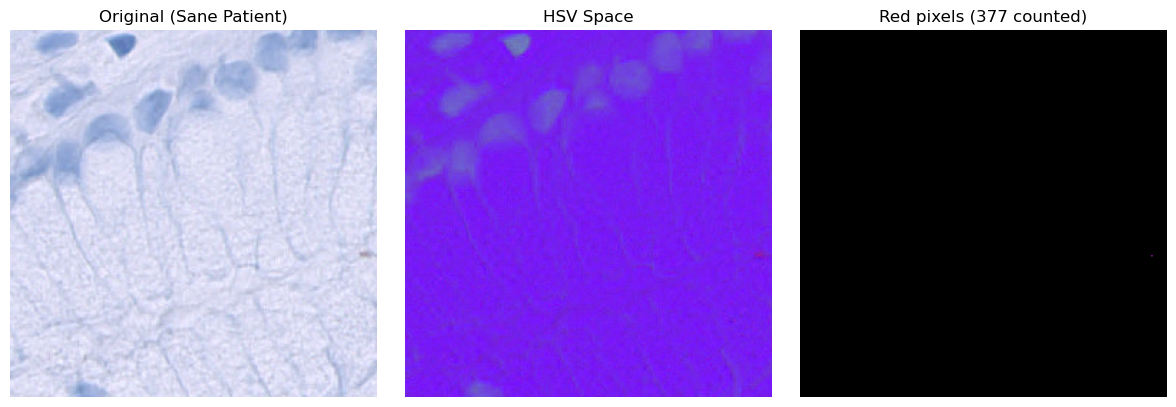

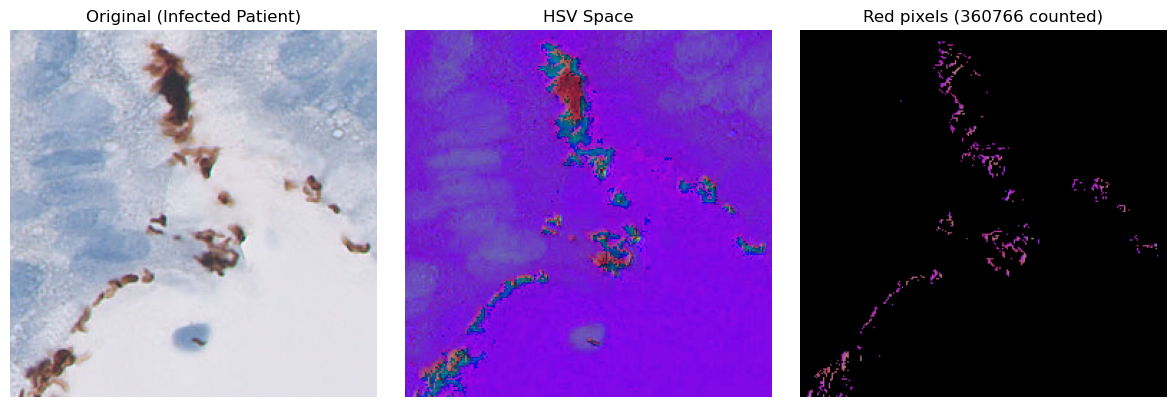

In [ ]:
img_good = process_img(train_imgs[11]['img'][0], masking[0], masking[1])
img_bad = process_img(train_imgs[69]['img'][0], masking[0], masking[1])

titles_good = ['Original (Sane Patient)', 'HSV Space', f'Red pixels ({img_good} counted)']
titles_bad = ['Original (Infected Patient)', 'HSV Space', f'Red pixels ({img_bad} counted)']

visualize(train_imgs[11]['img'][0], masking, titles_good)
visualize(train_imgs[69]['img'][0], masking, titles_bad)